In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
# from os import path

BLACK = 0
MEDIUM_GRAY = 127
WHITE = 255

max = 256

def getLocalTime() -> str:
    named_tuple = time.localtime() # get struct_time
    return time.strftime("%d/%m/%Y, %H:%M:%S", named_tuple)


def showImage(image, cmap = 'gray') -> None:
    ax = plt.subplots()[1]
    ax.imshow(image, cmap = cmap, vmin = BLACK, vmax = WHITE)


def showImages(images, cmap = 'gray') -> None:
    _, axs = plt.subplots(nrows=1, ncols=len(images))

    for i in range(len(images)):
        axs[i].imshow(images[i], cmap = cmap, vmin = BLACK, vmax = WHITE)

    plt.tight_layout()

def saveImage(image, filename = 'result', cmap = 'gray', mode = 'sync') -> None:    
    ax = plt.subplots()[1]
    ax.imshow(image, cmap = cmap, vmin = BLACK, vmax = WHITE)
    plt.savefig(filename, bbox_inches = 'tight', pad_inches = 0)

    if mode == 'sync':
        plt.show()


**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


Na imagem negativa os objetos são melhor identificados, pois os pontos pretos se destacam no fundo branco


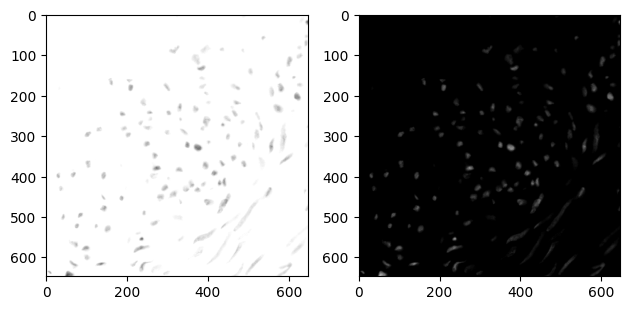

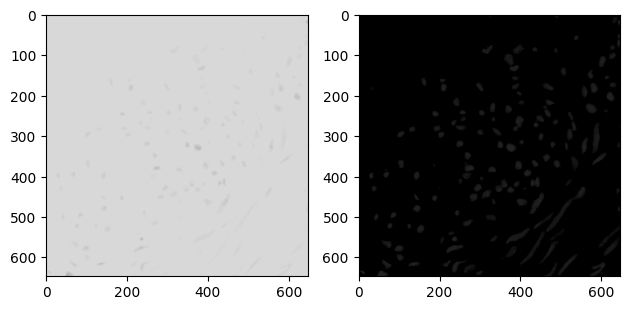

In [15]:
# code here
path = "im_cells.png"
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
negativa = image * -1 + 255
original = (negativa - 255) * -1

# showImage(negativa)
# showImage(original)

showImages((negativa, original))
print("Na imagem negativa os objetos são melhor identificados, pois os pontos pretos se destacam no fundo branco")

logOriginal = np.log2(original + 1) * 5
logNegativa = np.log2(negativa + 1) * 27

showImages((logNegativa, logOriginal))

2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



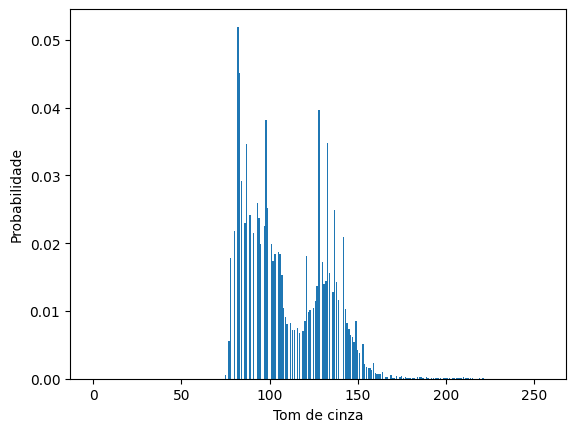

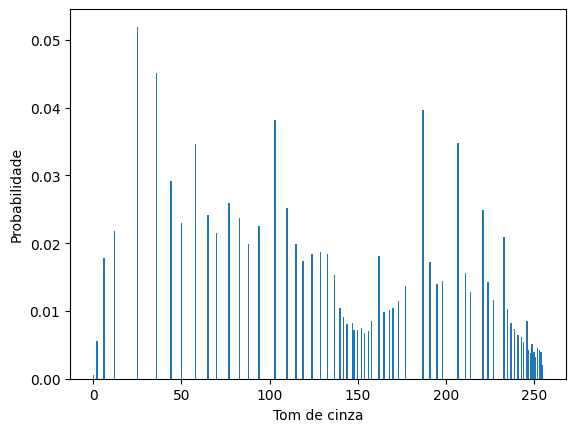

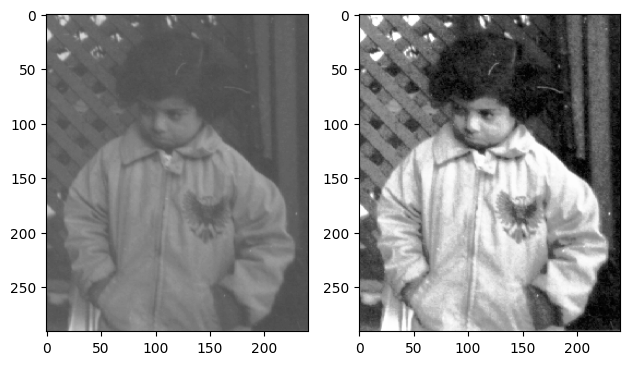

In [17]:
# code here
path = "pout.tif"
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def getProbabilities(image, max = 256):
    height, width = image.shape
    freq = np.zeros(max)

    copy = np.array(image)
    unique, counts = np.unique(copy, return_counts=True)
    freq = np.asarray((unique, counts)).T

    prob = np.zeros(max)
    for key, value in freq:
        prob[key] = value / (height * width)
        
    return prob

def plotHistograma(image, max = 256):
    hist = getProbabilities(image, max)
        
    plt.xlabel('Tom de cinza')
    plt.ylabel('Probabilidade')

    plt.bar(range(max), hist)
    plt.show()


plotHistograma(image)

equalized = cv2.equalizeHist(image)
plotHistograma(equalized)

showImages((image, equalized))

# plt.imshow(image, cmap = 'gray', vmin = 0, vmax = max - 1)
# plt.imshow(result, cmap = 'gray', vmin = 0, vmax = max - 1)

3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

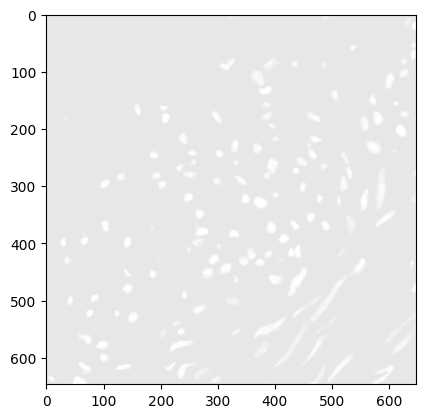

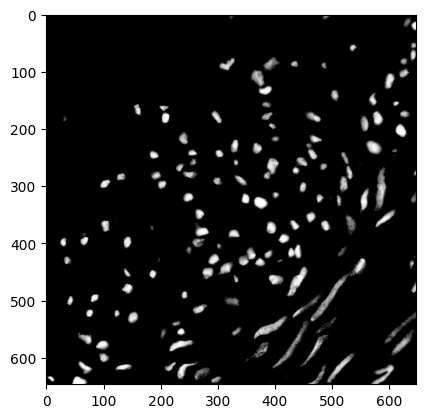

In [24]:
# code here
path = "im_cells.png"
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def getAccumulatedProbabilities(image, max): 
    accProba = {}
    sumProba = 0
    
    prob = getProbabilities(image, max)
    accProba[0] = prob[0] 
    for i in range(1, 256):
        sumProba += prob[i - 1]
        accProba[i] = prob[i] + sumProba

    return accProba

def equalizeImage(image, max = 256):
    height, width = image.shape

    newColors = {}
    accumProb = getAccumulatedProbabilities(image, max)
    equalized = np.array(image)

    for i in range(0, 256):
        newColors[i] = np.ceil(accumProb[i] * 255)

    for i in range(height):
        for j in range(width):
            equalized[i][j] = newColors[equalized[i][j]]

    return equalized

showImage(equalizeImage(image))
showImage(cv2.equalizeHist(image))